# Walmart sales study Python version 

In [4]:
import requests
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import string
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
url= 'https://raw.githubusercontent.com/dongjiecheng/walmart_Store_Sales/main/Walmart_Store_sales.csv'
r = requests.get(url, allow_redirects=True)
open('Walmart_Store_sales.csv', 'wb').write(r.content)


359864

In [5]:
data = pd.read_csv('Walmart_Store_sales.csv')

In [6]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,5/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [8]:
data['Date']

0         5/2/2010
1        12/2/2010
2       19-02-2010
3       26-02-2010
4         5/3/2010
           ...    
6430    28-09-2012
6431     5/10/2012
6432    12/10/2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

In [7]:
data["Date"] = pd.to_datetime(data["Date"],dayfirst=True).dt.strftime('%Y-%m-%d')
#data['Date'] = pd.to_datetime(data.Date)
#type(data['Date'])
#data['Date'] = data['Date'].dt.strftime('%Y-%m-%d %H:%M')
#data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


# setup holidays

In [8]:

data['Day_class']='Normal_day'

data.loc[data['Holiday_Flag'] == 1, 'Day_class'] = 'Holiday'


     


In [11]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
data.shape

(6435, 9)

In [13]:
data = data.dropna()

In [14]:
data.shape

(6435, 9)

In [15]:
data_counts = data['CPI'].value_counts()
#data_counts[-10:]

In [16]:
data_counts

129.898065    11
126.064000    11
126.234600    11
130.737871    11
126.208548    11
              ..
223.450688     1
217.276013     1
203.201097     1
210.887277     1
216.365588     1
Name: CPI, Length: 2145, dtype: int64

Text(0.5, 1.0, 'Sales distribution')

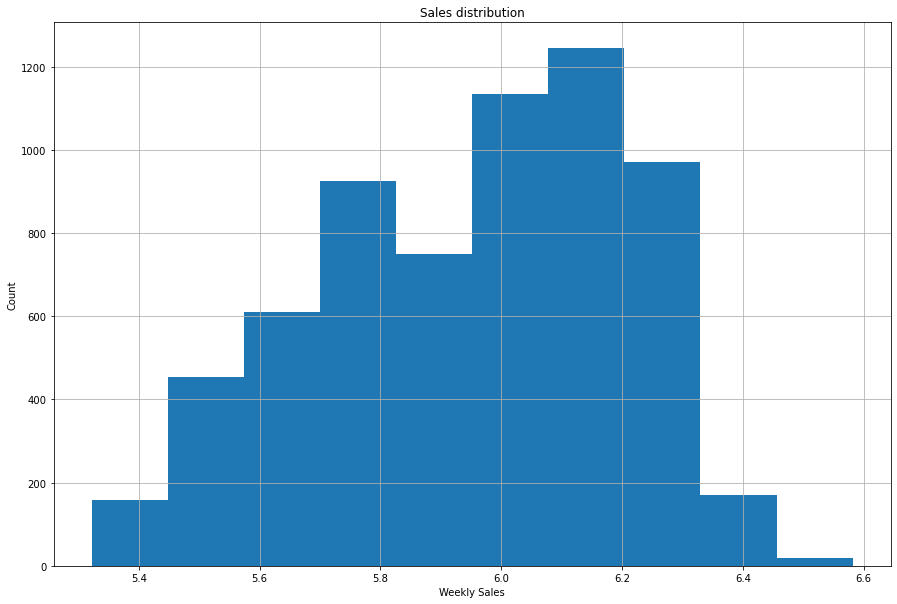

In [9]:
#data_counts.plot(kind='bar', figsize=(15,10))
ax=np.log10(data['Weekly_Sales']).plot(kind='hist',figsize=(15,10),grid=True)
#ax=data['Weekly_Sales'].plot(kind='hist',figsize=(15,10),grid=True, rot=90,fontsize=14)
ax.set_xlabel('Weekly Sales')
ax.set_ylabel('Count')
ax.set_title('Sales distribution')



In [10]:
Super_Bowl=['2010-02-12','2011-02-11','2012-02-10']
data.loc[data['Date'].str.contains('|'.join(Super_Bowl)) , 'Day_class'] = 'Super_Bowl'
Labor_Day=["2010-09-10","2011-09-09","2012-09-07","2013-09-06"]
data.loc[data['Date'].str.contains('|'.join(Labor_Day)) , 'Day_class'] = 'Labor_Day'
Thanksgiving=["2010-11-26","2011-11-25","2012-11-23","2013-11-29"]
data.loc[data['Date'].str.contains('|'.join(Thanksgiving)) , 'Day_class'] = 'Thanksgiving'
Christmas=["2010-12-31","2011-12-30","2012-12-28","2013-12-27"]
data.loc[data['Date'].str.contains('|'.join(Christmas)) , 'Day_class'] = 'Christmas'
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day_class
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Normal_day
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Bowl
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Normal_day
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Normal_day
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,Normal_day
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Normal_day
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,Normal_day
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,Normal_day
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Normal_day


In [24]:
temp=data['Day_class']=='Christmas'

temp=data['Day_class']=='Thanksgiving'
data[temp]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day_class


In [11]:
import ipywidgets as widgets
from IPython import display
# create output widgets
widget1 = widgets.Output()
widget2 = widgets.Output()
temp=data['Day_class']=='Christmas'
df1=data[temp]
temp=data['Day_class']=='Thanksgiving'
df2=data[temp]
# render in output widgets
with widget1:
    display.display(df1)
with widget2:
    display.display(df2)
# create HBox
hbox = widgets.HBox([widget1, widget2])

# render hbox
hbox

<AxesSubplot:xlabel='Date', ylabel='Store'>

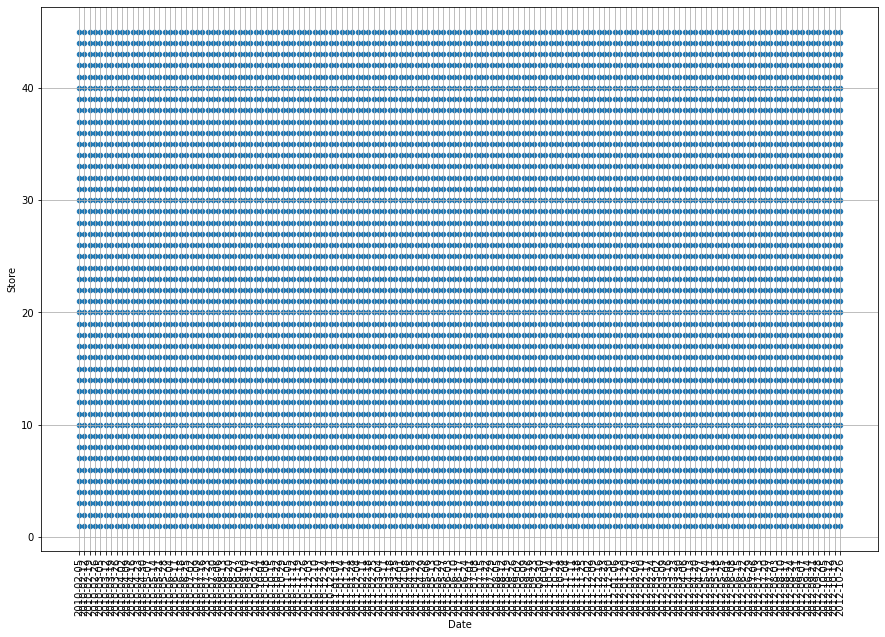

In [154]:
data.plot(x='Date', y='Store', kind='scatter',figsize=(15,10), rot=90, grid=True)

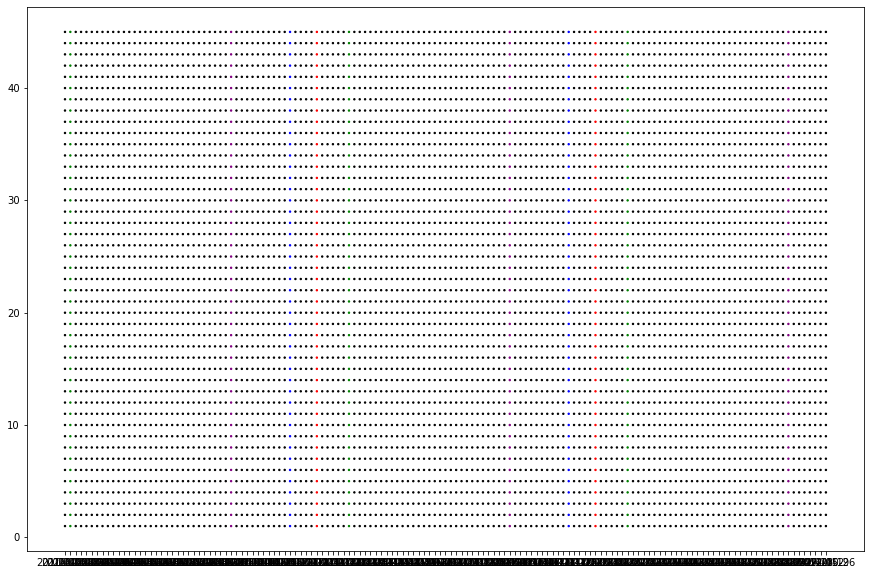

In [178]:
date=data['Date']
store=data['Store']
day=data['Day_class']
plt.figure(figsize=(15,10))
color_dict = { 'Christmas':'red', 'Thanksgiving':'blue', 'Normal_day':'black', 'Super_Bowl':'green','Labor_Day':'purple' }
plt.scatter(date,store,s=2,color=[ color_dict[i] for i in day ])
plt.show()

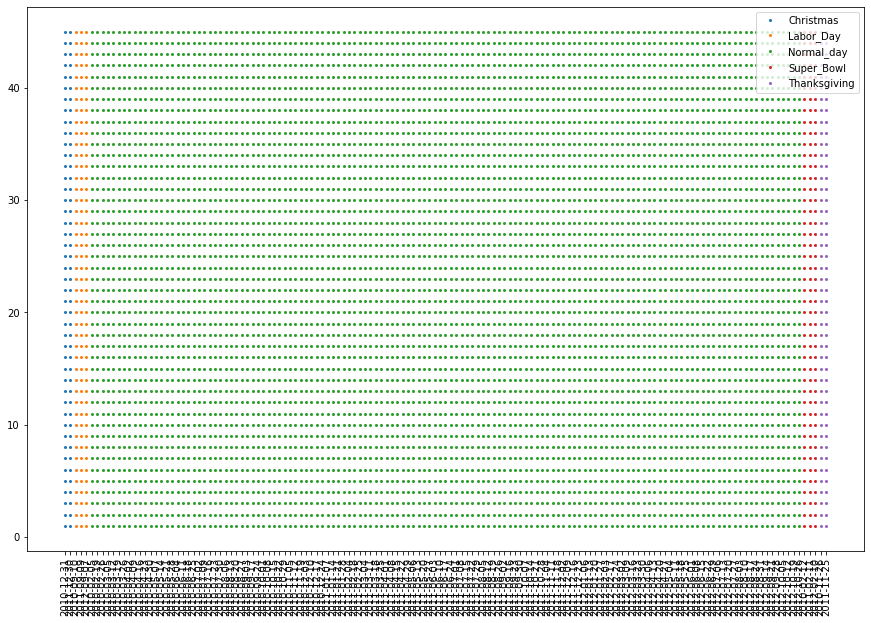

In [169]:
groups = data.groupby('Day_class')
# Plot
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Date, group.Store, marker='o', linestyle='', ms=2, label=name)
ax.legend()
#ax.set_xticks(np.arange(len(data['Date']))) 
#ax.set_xticklabels(data['Date'])
plt.xticks(rotation=90)

plt.show()

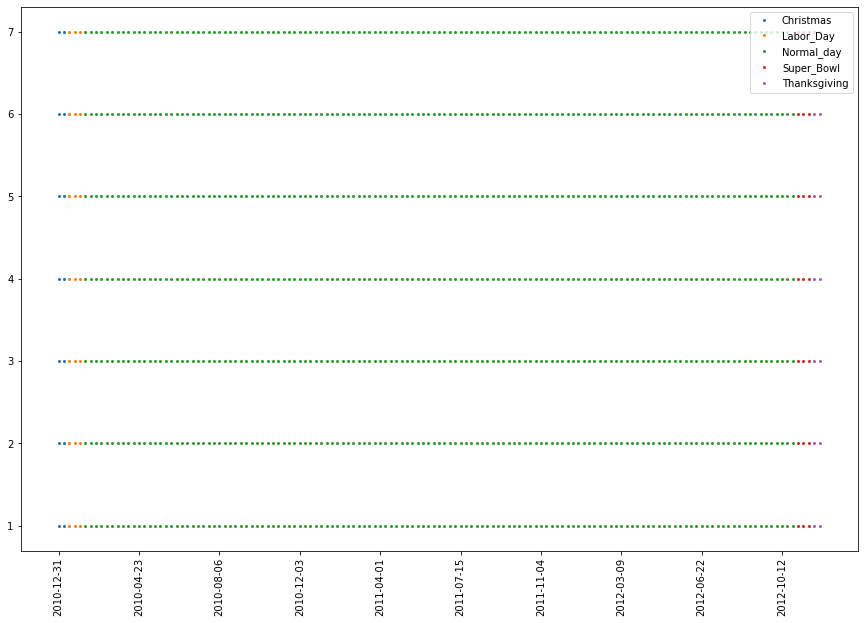

In [33]:
import matplotlib.ticker as ticker
groups = data[:1000].groupby('Day_class')
# Plot
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Date, group.Store, marker='o', linestyle='', ms=2, label=name)
ax.legend()
#ax.set_xticks(np.arange(len(data['Date']))) 
#ax.set_xticklabels(data['Date'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
plt.xticks(rotation=90)

plt.show()

In [35]:
#data.reset_index()
sale_sum= data[['Store','Weekly_Sales']].groupby('Store').sum().reset_index()
#sale_sum.head()
#type(sale_sum)


<AxesSubplot:>

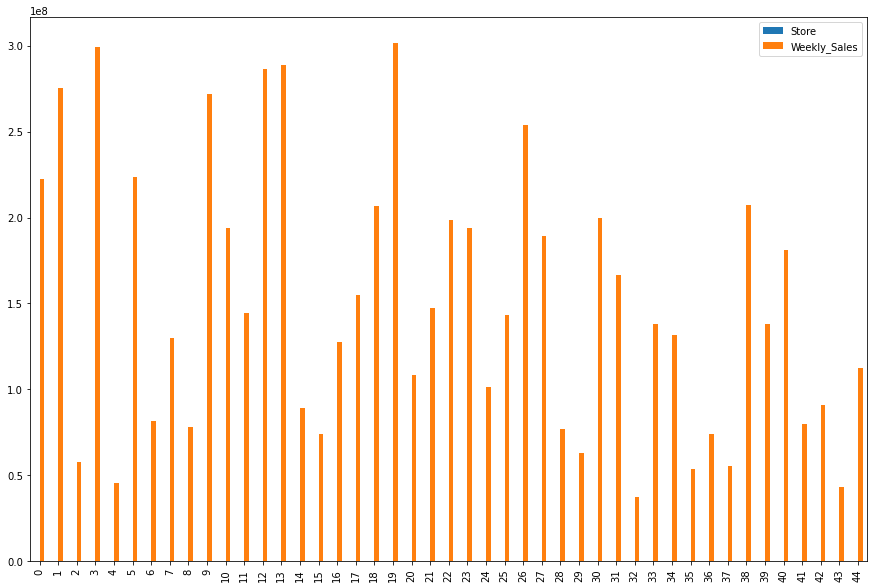

In [36]:
sale_sum.head()
sale_sum.plot.bar(figsize=(15,10))

NameError: name 'sale_sum' is not defined

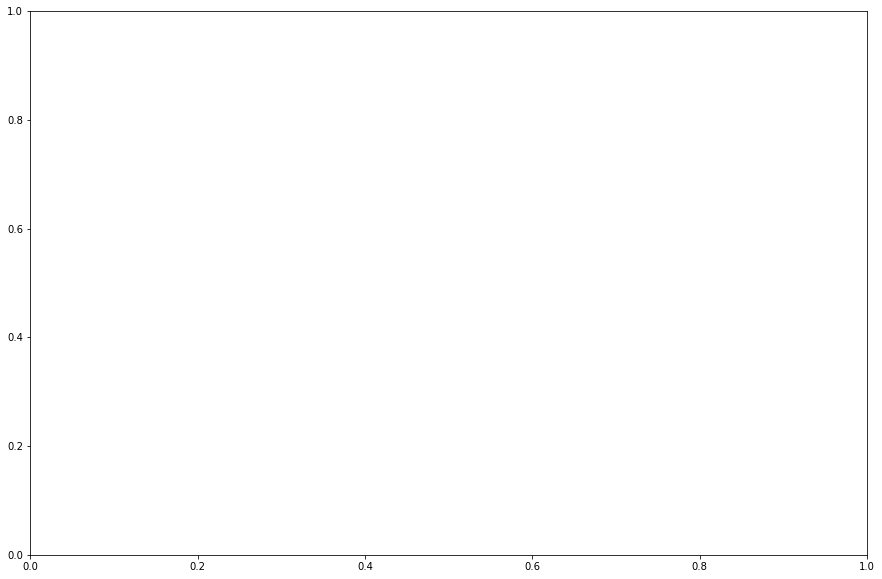

In [12]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot()
#plt.scatter(sale_sum['Store'],sale_sum['Weekly_Sales'])
plt.plot(sale_sum['Store'],sale_sum['Weekly_Sales'],color='green', marker='o', 
         linewidth=2, markersize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
plt.xticks(rotation=90)

plt.show()

<ErrorbarContainer object of 3 artists>

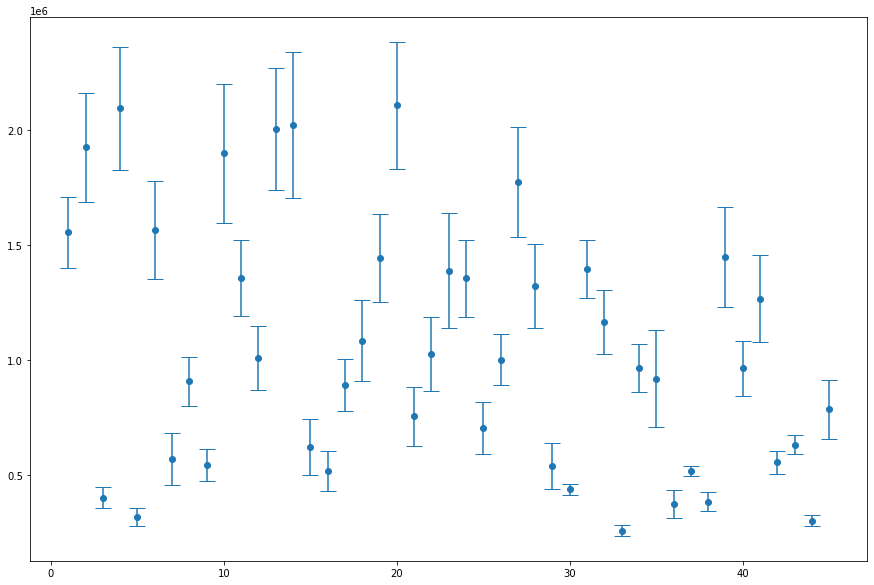

In [54]:
sale_mean= data[['Store','Weekly_Sales']].groupby('Store').mean().reset_index()
sale_std= data[['Store','Weekly_Sales']].groupby('Store').std().reset_index()
#sale_mean
#sale_std
#sale_mean.plot.bar(yerr=sale_std,capsize=4,figsize=(15,10))
fig=plt.figure(figsize=(15,10))
plt.errorbar(sale_mean['Store'],sale_mean['Weekly_Sales'],yerr=sale_std['Weekly_Sales'],capsize=8, fmt='o')


## growth

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

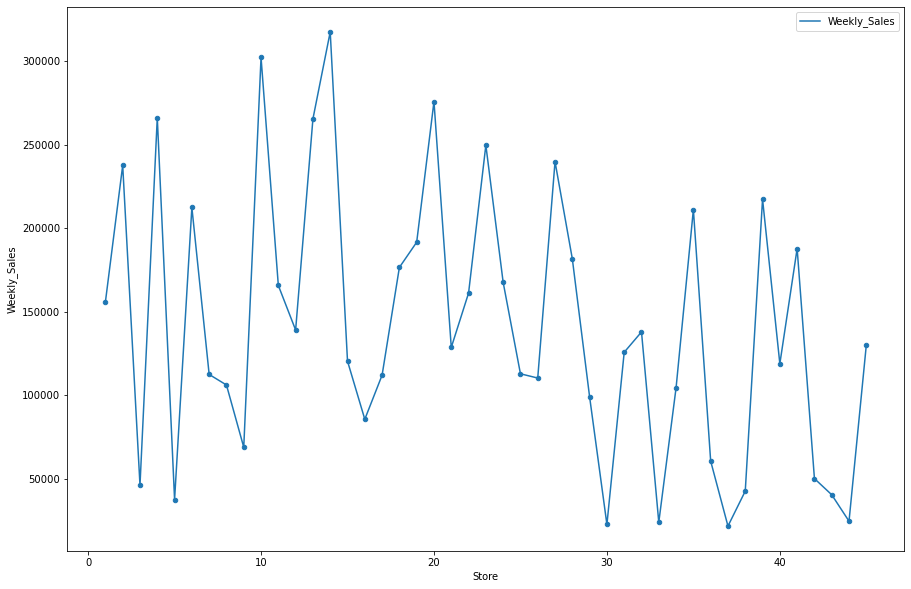

In [61]:

ax=sale_std.plot(x='Store',y='Weekly_Sales',figsize=(15,10))
sale_std.plot(x='Store',y='Weekly_Sales',kind='scatter',marker='o',figsize=(15,10),ax=ax)

In [19]:
import warnings
warnings.filterwarnings('ignore')


t1=pd.to_datetime(data['Date'])<pd.to_datetime('2012-10-01')
t2=pd.to_datetime(data['Date'])>pd.to_datetime('2012-03-31')
t=t1&t2
q2_3_sales=data[t]

q2_3_sales['Quarter'] = np.where(pd.to_datetime(q2_3_sales['Date'])>pd.to_datetime('2012-06-30'), 3, 2)
#q2_3_sales.loc(q2_3_sales.Date>pd.to_datetime('2012-06-30'), 'quarter')=3

#len(q2_3_sales)
q2_3_sales['Month']=pd.to_datetime(data['Date']).dt.month
q2_3_sales['Year']=pd.to_datetime(data['Date']).dt.year
#q2_3_sales
q2_3_sales[['Store','Quarter','Year','Weekly_Sales']]

,Store,Quarter,Year,Weekly_Sales
113,1,2,2012,1899676.88
114,1,2,2012,1621031.70
115,1,2,2012,1521577.87
116,1,2,2012,1468928.37
117,1,2,2012,1684519.99
...,...,...,...,...
6426,45,3,2012,734297.87
6427,45,3,2012,766512.66
6428,45,3,2012,702238.27
6429,45,3,2012,723086.20


In [117]:
q2_3_summary=q2_3_sales[['Store','Quarter','Year','Weekly_Sales']].groupby(['Store','Year','Quarter']).mean().reset_index()
q23=q2_3_summary[['Store','Quarter','Weekly_Sales']]
q23

,Store,Quarter,Weekly_Sales
0,1,2,1.613751e+06
1,1,3,1.557996e+06
2,2,2,1.929508e+06
3,2,3,1.869489e+06
4,3,2,4.323320e+05
...,...,...,...
85,43,3,6.154286e+05
86,44,2,3.312620e+05
87,44,3,3.393270e+05
88,45,2,7.992898e+05


<AxesSubplot:xlabel='Store'>

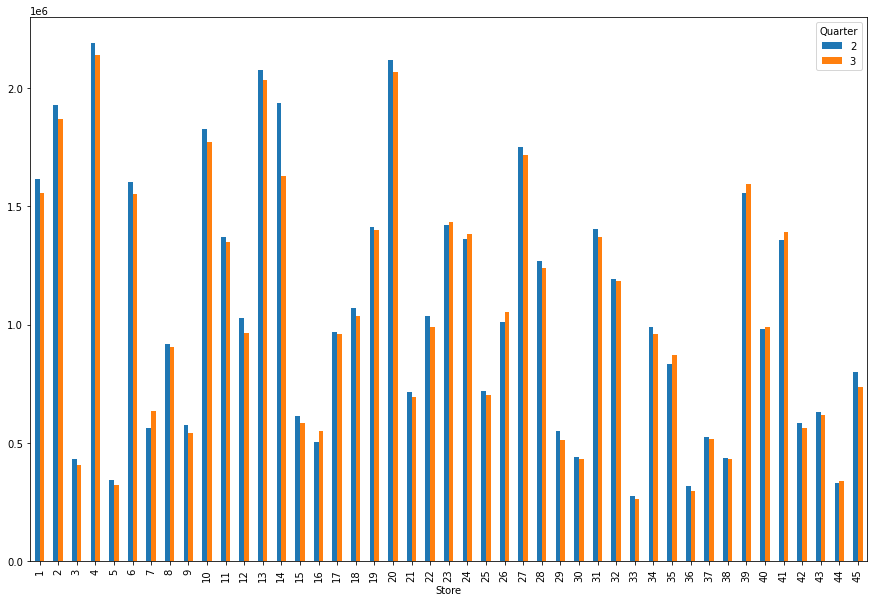

In [120]:
#ax = q23[q23['Quarter']==2]['Weekly_Sales'].plot.bar(rot=90)
#q23[q23['Quarter']==3]['Weekly_Sales'].plot.bar(ax=ax)

pd.pivot_table(q23, index='Store', columns='Quarter', values='Weekly_Sales').plot(kind='bar',figsize=(15,10))

In [148]:
q23_grow=q23.diff()[q23.diff()['Store']==0]
q23_grow['Store']=np.linspace(1,45,45)
q23_grow=q23_grow.reset_index(drop=True)
q23_grow=q23_grow.drop('Quarter', axis=1)
q23_grow.head()
#q23.set_index('Quarter').diff().reset_index

,Store,Weekly_Sales
0,1.0,-55754.795385
1,2.0,-60019.232308
2,3.0,-24793.155385
3,4.0,-50582.400769
4,5.0,-23274.823077


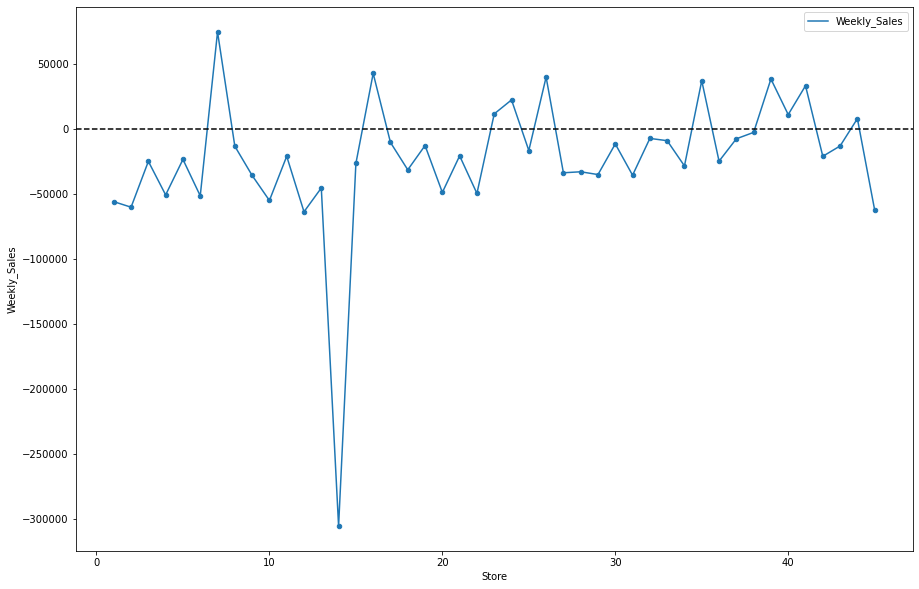

In [147]:
ax=q23_grow.plot(x='Store',y='Weekly_Sales',figsize=(15,10))
q23_grow.plot(x='Store',y='Weekly_Sales',kind='scatter',marker='o',figsize=(15,10),ax=ax)
ax.axhline(0, color='k', linestyle='--')
#plt.plot((0,0),(45,0))

## Holiday sales

In [149]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day_class
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Normal_day
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Bowl
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Normal_day
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Normal_day
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,Normal_day


<AxesSubplot:>

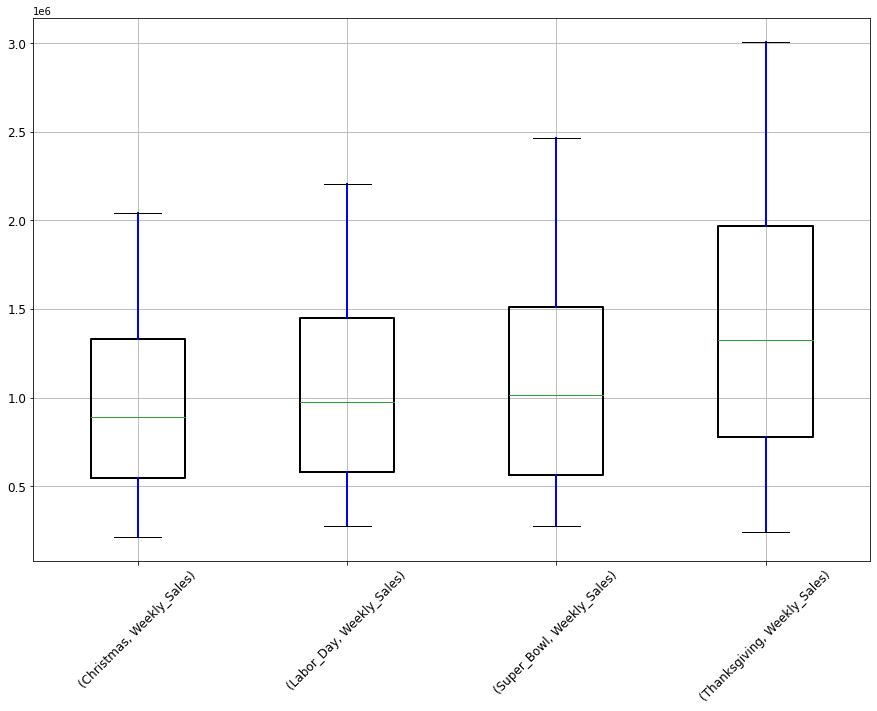

In [20]:
data_holiday=data[data['Day_class']!='Normal_day']
grouped = data_holiday[['Day_class','Weekly_Sales']].groupby('Day_class')
grouped
grouped.boxplot(rot=45, fontsize=12, figsize=(15,10),subplots=False,whiskerprops = dict(linestyle='-',linewidth=2.0
, color='blue'),boxprops= dict(linewidth=2.0, color='black'))
#grouped.boxplot(rot=45, fontsize=12, figsize=(15,10))

<AxesSubplot:xlabel='Month'>

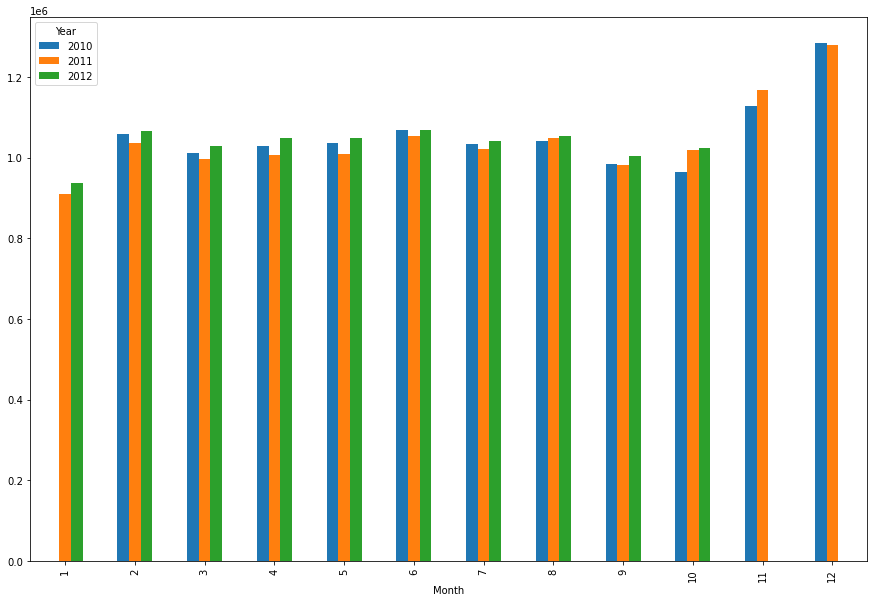

In [21]:
data['Month']=pd.to_datetime(data['Date']).dt.month
data['Year']=pd.to_datetime(data['Date']).dt.year
pd.pivot_table(data, index='Month', columns='Year', values='Weekly_Sales').plot(kind='bar',figsize=(15,10))

<AxesSubplot:xlabel='Month', ylabel='value'>

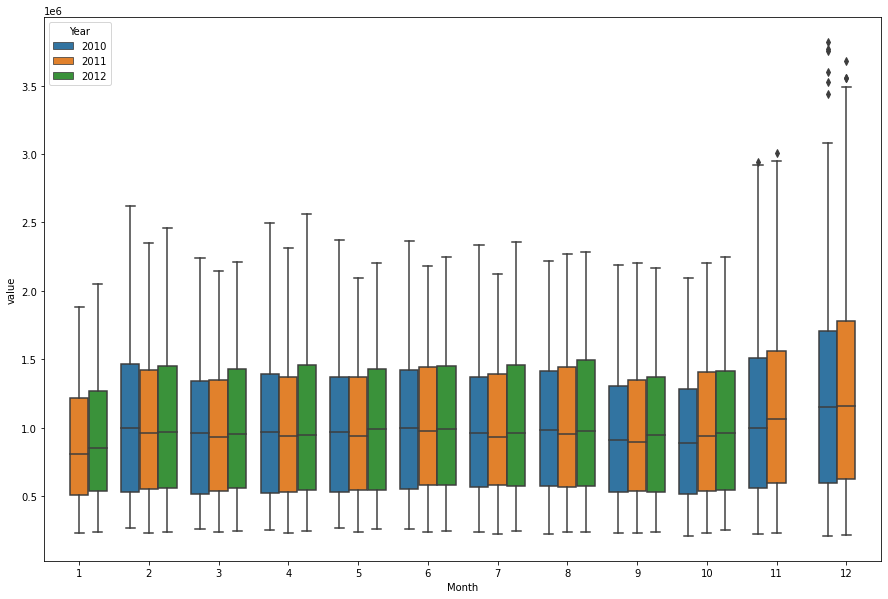

In [36]:
import seaborn as sns

grouped = data[['Month','Year','Weekly_Sales']].groupby(['Month','Year'])
grouped
dd=pd.melt(data,id_vars=['Month','Year'],value_vars=['Weekly_Sales'],var_name='Sales')
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='Month',y='value',data=dd,hue='Year',ax=ax)
#grouped.boxplot(rot=90, fontsize=12, figsize=(15,10),subplots=False,whiskerprops = dict(linestyle='-',linewidth=2.0, color='blue'),boxprops= dict(linewidth=2.0, color='black'))

In [25]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day_class,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Normal_day,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Bowl,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Normal_day,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Normal_day,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,Normal_day,3,2010


# Modeling & Inversion

In [13]:
ndat1=data[data['Store']==1][['CPI','Unemployment','Fuel_Price','Weekly_Sales']]
ndat1

,CPI,Unemployment,Fuel_Price,Weekly_Sales
0,211.096358,8.106,2.572,1643690.90
1,211.242170,8.106,2.548,1641957.44
2,211.289143,8.106,2.514,1611968.17
3,211.319643,8.106,2.561,1409727.59
4,211.350143,8.106,2.625,1554806.68
...,...,...,...,...
138,222.981658,6.908,3.666,1437059.26
139,223.181477,6.573,3.617,1670785.97
140,223.381296,6.573,3.601,1573072.81
141,223.425723,6.573,3.594,1508068.77


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

## split data & linear regression

In [15]:
train, test = train_test_split(ndat1, test_size=0.33, random_state=324)


### 1 parameter

In [17]:
regressor = LinearRegression()
regressor.fit(train[['CPI']], train['Weekly_Sales'])
y_prediction = regressor.predict(test[['CPI']])
y_prediction

array([1520987.30304034, 1531166.60905377, 1615844.21552717,
       1529556.54252821, 1530847.64090382, 1602596.80776271,
       1529544.90293035, 1620389.74475663, 1604997.89456506,
       1520548.74195887, 1559453.93946051, 1595940.94902697,
       1610758.53748117, 1566253.18250826, 1621431.24726861,
       1601019.84217288, 1530793.33781872, 1529524.35184831,
       1529890.73910779, 1565712.07301354, 1631500.30352065,
       1533970.55792473, 1553030.75326065, 1564629.85402411,
       1532708.67000366, 1567386.64474323, 1536099.47558041,
       1563476.13527968, 1529095.67796742, 1565170.96351883,
       1530881.51852042, 1633267.90976519, 1528877.4509881 ,
       1566449.2687751 , 1528607.64726814, 1635428.51653123,
       1597865.91187781, 1527417.78720968, 1567945.89654776,
       1557355.41939574, 1576026.34634752, 1593754.98778807,
       1589383.06619488, 1623156.31829325, 1523921.97048671,
       1622221.43336537, 1620560.30316855, 1627965.09103156])

In [18]:
RMSE = sqrt(mean_squared_error(y_true=test[['Weekly_Sales']], y_pred = y_prediction))
print(RMSE)

121505.34960732952


### 2 parameters

In [ ]:
regressor = LinearRegression()
regressor.fit(train[['CPI','Fuel_Price']], train['Weekly_Sales'])

In [14]:
y_prediction = regressor.predict(test[['CPI','Fuel_Price']])
y_prediction

array([1520766.0010603 , 1536313.00686146, 1612925.90517219,
       1526692.21225916, 1536656.79018802, 1611814.24174122,
       1534951.97808264, 1619716.02915049, 1611847.12317747,
       1520568.92306348, 1549195.4449275 , 1603614.66998945,
       1611382.52793021, 1554550.4024433 , 1631554.2556238 ,
       1610613.22115222, 1537640.78090131, 1535741.0141128 ,
       1538082.14624051, 1552677.65197444, 1633937.51648807,
       1539835.01887889, 1543015.2042979 , 1552215.50781961,
       1537471.16502266, 1548876.49500747, 1534017.64087288,
       1548382.2061456 , 1529120.69817067, 1552065.71051021,
       1535542.64985742, 1637395.18901211, 1534158.62293994,
       1550273.29480515, 1534930.51548416, 1640652.52267342,
       1605952.23159384, 1530974.0322004 , 1559387.0521868 ,
       1547958.10011475, 1573985.23578578, 1600562.60306527,
       1591621.65004275, 1626186.56614667, 1526707.48319468,
       1631867.92215314, 1623261.36307496, 1628256.71359037])

## RMSE

In [16]:
RMSE = sqrt(mean_squared_error(y_true=test[['Weekly_Sales']], y_pred = y_prediction))
print(RMSE)

120675.63560480949


### 3 parameters

In [19]:
regressor = LinearRegression()
regressor.fit(train[['CPI','Fuel_Price','Unemployment']], train['Weekly_Sales'])
y_prediction = regressor.predict(test[['CPI','Fuel_Price','Unemployment']])
y_prediction

array([1490159.39942497, 1523440.43194875, 1628351.03177502,
       1492819.24392481, 1524331.25530275, 1627573.93832688,
       1523718.97280641, 1611349.40750472, 1627300.93112416,
       1489740.2676555 , 1533992.12768046, 1691810.29367769,
       1625311.92737699, 1591205.94832033, 1640253.53686076,
       1708240.41301537, 1526754.51267091, 1525658.73132294,
       1527970.83389962, 1586688.89600541, 1606792.25175108,
       1539881.77201352, 1529426.79203544, 1585713.96576573,
       1534265.46180994, 1532040.64048408, 1509836.02615866,
       1531403.45935762, 1514301.0438591 , 1585266.56665631,
       1529800.98553034, 1561094.1598118 , 1569838.83787731,
       1535607.24977996, 1571773.23548062, 1568771.16897006,
       1697264.38716928, 1562237.12058592, 1602828.4007418 ,
       1540922.30471659, 1637470.04858985, 1684640.85777442,
       1663338.86183081, 1588996.32599129, 1504310.76335051,
       1603079.24011399, 1620026.49292869, 1593369.20829715])

In [20]:
RMSE = sqrt(mean_squared_error(y_true=test[['Weekly_Sales']], y_pred = y_prediction))
print(RMSE)

121639.36723760997


## KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
regressor =KNeighborsRegressor(n_neighbors=5)
regressor.fit(train[['CPI','Fuel_Price','Unemployment']], train['Weekly_Sales'])
y_prediction = regressor.predict(test[['CPI','Fuel_Price','Unemployment']])
y_prediction

array([1493677.586, 1594365.648, 1684840.3  , 1650920.67 , 1495701.28 ,
       1697586.566, 1474146.436, 1614211.754, 1607522.768, 1493677.586,
       1532538.154, 1811055.858, 1724507.8  , 1491418.554, 1650003.102,
       1697586.566, 1495701.28 , 1474146.436, 1479432.7  , 1496288.268,
       1563341.868, 1532710.2  , 1558188.986, 1528869.508, 1535462.288,
       1559158.954, 1459301.578, 1543806.878, 1661065.67 , 1490294.234,
       1594365.648, 1563341.868, 1546011.14 , 1580022.35 , 1546011.14 ,
       1563341.868, 1743755.212, 1542354.804, 1501061.176, 1550194.148,
       1504271.742, 1808185.442, 1654660.2  , 1547775.05 , 1474432.73 ,
       1591907.534, 1646547.48 , 1567301.828])

In [56]:
RMSE = sqrt(mean_squared_error(y_true=test[['Weekly_Sales']], y_pred = y_prediction))
print(RMSE)

116636.4611270844


### cross validation

In [63]:
RMSE=np.linspace(1,1,10)
n=np.linspace(1,10,10)

for i in range(10):
    #print(i*2+1)
    RMSE[i]=1.
    regressor =KNeighborsRegressor(n_neighbors=i+1)
    regressor.fit(train[['CPI','Fuel_Price','Unemployment']], train['Weekly_Sales'])
    y_prediction = regressor.predict(test[['CPI','Fuel_Price','Unemployment']])
    RMSE[i] = sqrt(mean_squared_error(y_true=test[['Weekly_Sales']], y_pred = y_prediction))

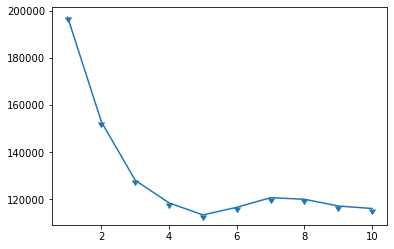

In [64]:
plt.plot(n,RMSE,marker=11)

## Random forests

In [67]:
from sklearn.ensemble import RandomForestRegressor

### cross validation

In [86]:
#RMSE=np.linspace(1,1,10)
#n=np.linspace(1,10,10)

#for i in range(10):
    #print(i*2+1)
#    RMSE[i]=1.
#regressor =RandomForestRegressor(bootstrap=True, n_estimators = 1000, random_state = 42)
regressor =RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth=1)
regressor.fit(train[['CPI','Fuel_Price','Unemployment']], train['Weekly_Sales'])
y_prediction = regressor.predict(test[['CPI','Fuel_Price','Unemployment']])
RMSE = sqrt(mean_squared_error(y_true=test[['Weekly_Sales']], y_pred = y_prediction))

In [87]:
RMSE

119782.87933793252

In [88]:
ndat1.corr()

,CPI,Unemployment,Fuel_Price,Weekly_Sales
CPI,1.000000,-0.813471,0.755259,0.225408
Unemployment,-0.813471,1.000000,-0.513944,-0.097955
Fuel_Price,0.755259,-0.513944,1.000000,0.124592
Weekly_Sales,0.225408,-0.097955,0.124592,1.000000


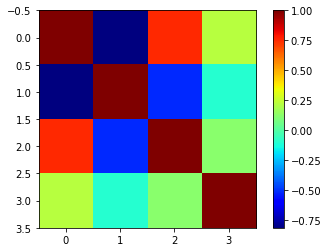

In [97]:
fig, ax = plt.subplots()
cmap = plt.get_cmap('jet')
im=ax.imshow(ndat1.corr(),cmap=cmap)
cbar = fig.colorbar(im, ax=ax)

plt.show()

# Gaussian Process

In [99]:
from sklearn.gaussian_process import GaussianProcessRegressor
regressor =GaussianProcessRegressor()
regressor.fit(train[['CPI','Fuel_Price','Unemployment']], train['Weekly_Sales'])
y_prediction = regressor.predict(test[['CPI','Fuel_Price','Unemployment']])
RMSE = sqrt(mean_squared_error(y_true=test[['Weekly_Sales']], y_pred = y_prediction))
RMSE

6773833.658481781

# Decision Tree

In [106]:
from sklearn.tree import DecisionTreeRegressor

RMSE=np.linspace(1,1,10)
n=np.linspace(1,10,10)

for i in range(10):
    regressor =DecisionTreeRegressor(random_state=324, max_depth=i+1)
    regressor.fit(train[['CPI','Fuel_Price','Unemployment']], train['Weekly_Sales'])
    y_prediction = regressor.predict(test[['CPI','Fuel_Price','Unemployment']])
    RMSE[i] = sqrt(mean_squared_error(y_true=test[['Weekly_Sales']], y_pred = y_prediction))
RMSE

array([119108.46634289, 164437.59658311, 195106.69052843, 217803.85787522,
       233964.06825738, 236425.31516553, 224158.31727629, 237984.711697  ,
       238553.17890122, 239290.80823768])

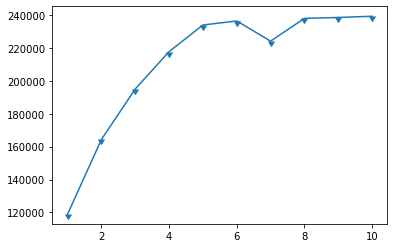

In [107]:
plt.plot(n,RMSE,marker=11)
#print(dir(regressor))

# Neural Network

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train[['CPI','Fuel_Price','Unemployment']])

X_train = scaler.transform(train[['CPI','Fuel_Price','Unemployment']])
X_test = scaler.transform(test[['CPI','Fuel_Price','Unemployment']])


In [110]:
from sklearn.neural_network import MLPRegressor

In [128]:
regressor =MLPRegressor(random_state=1, max_iter=10000, hidden_layer_sizes=(100,),solver='adam',alpha=0.0001)
regressor.fit(train[['CPI','Fuel_Price','Unemployment']], train['Weekly_Sales'])
y_prediction = regressor.predict(test[['CPI','Fuel_Price','Unemployment']])
#MLPRegressor.score(x=test[['CPI','Fuel_Price','Unemployment']], y=test['Weekly_Sales'])


RMSE = sqrt(mean_squared_error(y_true=test[['Weekly_Sales']], y_pred = y_prediction))
RMSE

C:\Users\chuang\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


320768.8727428572

### example
reg = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
# perform a polynomial features transform of the dataset
#trans = PolynomialFeatures(degree=3)
#train_x_trans = trans.fit_transform(train[['CPI','Fuel_Price','Unemployment']])

In [19]:
#train_x_trans.shape

(95, 20)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=1
regressor=make_pipeline(PolynomialFeatures(degree),LinearRegression())
regressor.fit(train[['CPI','Fuel_Price','Unemployment']], train['Weekly_Sales'])

y_prediction = regressor.predict(test[['CPI','Fuel_Price','Unemployment']])

RMSE = sqrt(mean_squared_error(y_true=test[['Weekly_Sales']], y_pred = y_prediction))
RMSE

121639.36723760888